In [2]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Create a sample data for understanding

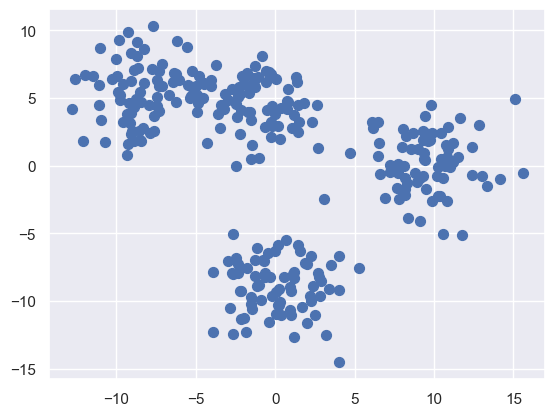

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300,
                       centers=4,
                       cluster_std=2.1,
                       random_state=7) # This will create a sample data
plt.scatter(X[:, 0], X[:, 1], s=50);

# Applying Kmean clustering on this dataset

Kmean for 4 clusters

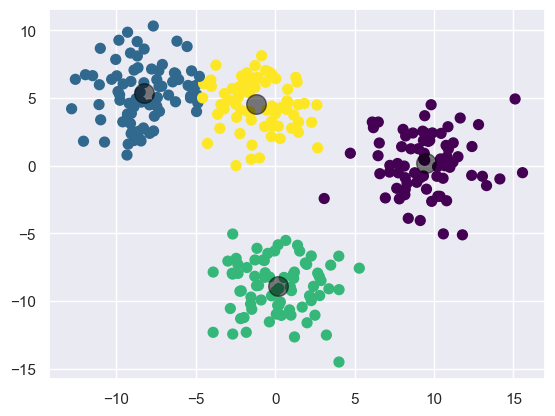

In [4]:
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 4,random_state=7)
mykmeans.fit(X)
y_kmeans = mykmeans.predict(X)

# Putting the data on plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Kmean for 5 Clustes

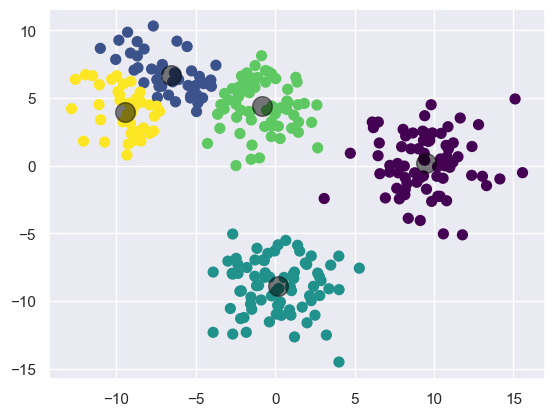

In [5]:
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 5,random_state=7)
mykmeans.fit(X)
y_kmeans = mykmeans.predict(X)

# Putting the data on plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Using db scan

befor db scane we have to standarize the data (another method of standerdization)

Number of clusters: 3
Outliers : 17


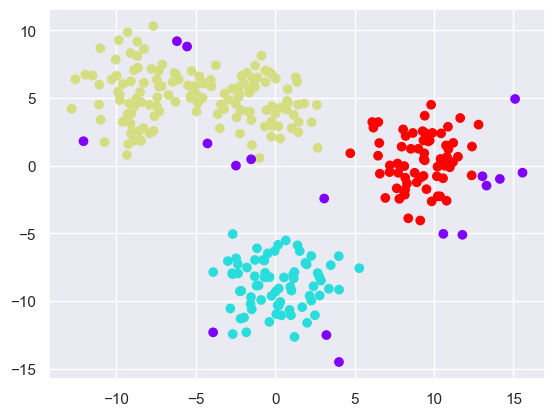

In [6]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)

# applyign db scan on thedata
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3,min_samples=10)
db_predict=db.fit_predict(x_std)
# plotting to see the vizulization
print('Number of clusters: {}'.format(len(set(db_predict[np.where(db_predict != -1)]))))
print('Outliers :', len(db_predict[np.where(db_predict == -1)]))
plt.scatter(X[:,0], X[:,1], c=db_predict, cmap='rainbow')

Incresign eps in dbscan (outliers may get merged with the data )

Number of clusters: 2
Outliers : 1


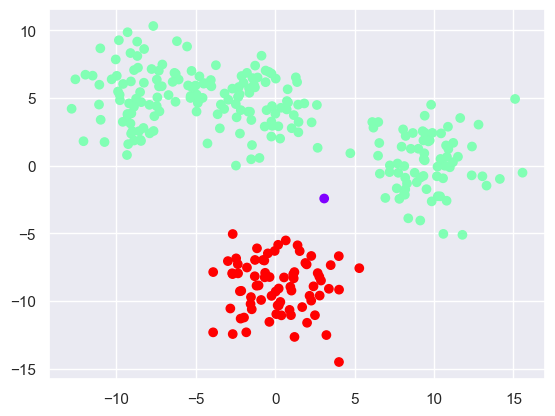

In [7]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)

# applyign db scan on thedata
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.5,min_samples=10)
db_predict=db.fit_predict(x_std)
# plotting to see the vizulization
print('Number of clusters: {}'.format(len(set(db_predict[np.where(db_predict != -1)]))))
print('Outliers :', len(db_predict[np.where(db_predict == -1)]))
plt.scatter(X[:,0], X[:,1], c=db_predict, cmap='rainbow')

Decresing the esp no of outliesrs wil increrse

Number of clusters: 5
Outliers : 89


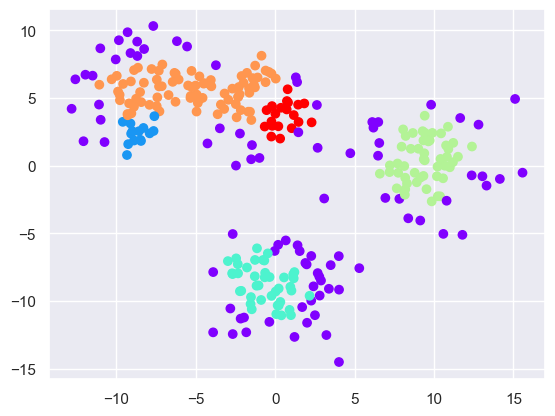

In [8]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)

# applyign db scan on thedata
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=10)
db_predict=db.fit_predict(x_std)
# plotting to see the vizulization
print('Number of clusters: {}'.format(len(set(db_predict[np.where(db_predict != -1)]))))
print('Outliers :', len(db_predict[np.where(db_predict == -1)]))
plt.scatter(X[:,0], X[:,1], c=db_predict, cmap='rainbow')

# Knee finding in dbscan using knearest neighbour algorithmen plo
- the best combination of eps and sample space it that in which the outlier perfcentage is no moer then 5 percent

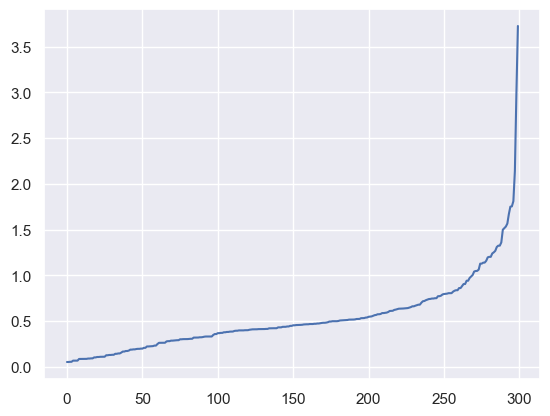

In [9]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

nigh=NearestNeighbors(n_neighbors=2)
nbrs=nigh.fit(X)
distance,indices=nbrs.kneighbors(X)
distances = np.sort(distance, axis=0)
#print(distance)
distances=distances[:,1]
plt.plot(distances)


In [13]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)

# applyign db scan on thedata
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.31,min_samples=10)
db_predict=db.fit_predict(x_std)
db_predict.shape
# percentage of outliesrs
print("Outlier percenteage: ",len(db_predict[np.where(db_predict == -1)])/db_predict.shape[0]*100)

Outlier percenteage:  3.6666666666666665


# Herrirchical clustering

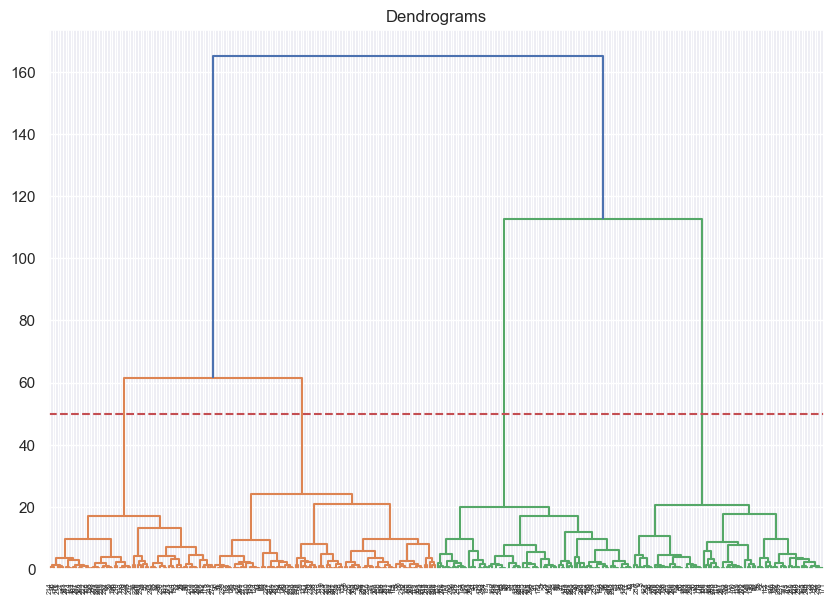

In [ ]:
# draw dendogram
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=50, color='r', linestyle='--')

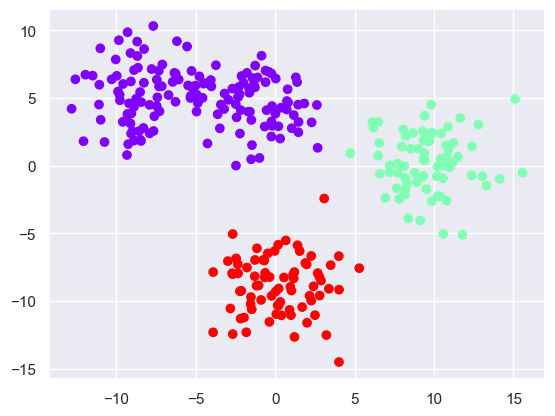

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3,linkage="ward")
clusters_label=ag.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters_label, cmap='rainbow')
